In [1]:
import matplotlib.pyplot as plt
import numpy as np

$$
q_z = \frac{2\pi}{\lambda} (sin(\alpha_{exit}) + sin(\alpha_{inc}))
$$

In [2]:
WAVELENGTH = 0.1

In [3]:
def get_qz(alpha_exit, alpha_incident, wavelength):
    qz = 2 * np.pi / wavelength * (np.sin(np.radians(alpha_exit)) + np.sin(np.radians(alpha_incident)))
    return qz

def get_alpha_exit(qz, alpha_incident, wavelength):
    alpha_exit = np.arcsin(qz * wavelength / (2 * np.pi) - np.sin(np.radians(alpha_incident))) * 180 / np.pi
    return alpha_exit
    
def get_qz_horizon(alpha_incident, wavelength):
    qz_h = get_qz(
        alpha_exit=0,
        alpha_incident=alpha_incident,
        wavelength=wavelength,
    )
    print(f"At wavelength={wavelength}nm-1, using at incident angle of {alpha_incident} degrees, the horizon is at qz={qz_h:.2f} nm-1. We cannot prove qz below that value.")
    return qz_h

##### Horizon is alpha_exit=0

##### Using an incident angle of 0.12 degrees

In [53]:
ALPHA_INCIDENT = 0.12
qz_horz = get_qz_horizon(
    alpha_incident=ALPHA_INCIDENT,
    wavelength=WAVELENGTH,
)

At wavelength=0.1nm-1, using at incident angle of 0.12 degrees, the horizon is at qz=0.13 nm-1. We cannot prove qz below that value.


##### Using an incident angle of 4 degrees

In [54]:
ALPHA_INCIDENT = 4
qz_horz = get_qz_horizon(
    alpha_incident=ALPHA_INCIDENT,
    wavelength=WAVELENGTH,
)

At wavelength=0.1nm-1, using at incident angle of 4 degrees, the horizon is at qz=4.38 nm-1. We cannot prove qz below that value.


##### QZ_001, a lattice parameter

In [55]:
QZ_001 = 3

In [57]:
ALPHA_INCIDENT = 0.12
alpha_exit = get_alpha_exit(
    qz=QZ_001,
    alpha_incident=ALPHA_INCIDENT,
    wavelength=WAVELENGTH,
)
print(f"Using at incident angle of {ALPHA_INCIDENT} degrees, the exit angle associated to 001 is {alpha_exit:.2f} degrees. It's over the horizon, so it can be proved.")

Using at incident angle of 0.12 degrees, the exit angle associated to 001 is 2.62 degrees. It's over the horizon, so it can be proved.


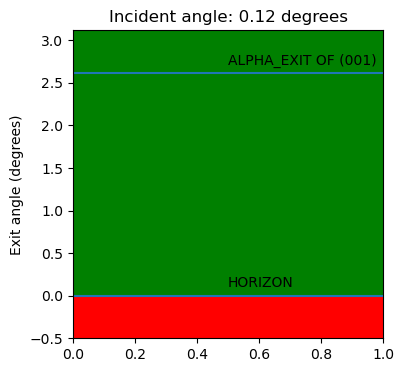

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ALPHA_INCIDENT = 0.12
QZ_001 = 3

alpha_exit = get_alpha_exit(
    qz=QZ_001,
    alpha_incident=ALPHA_INCIDENT,
    wavelength=WAVELENGTH,
)

ax.axhline(y = 0)
ax.text(x=0.5, y=0.1, s="HORIZON")
ax.axhline(y = alpha_exit)
ax.text(x=0.5, y=alpha_exit+0.1, s="ALPHA_EXIT OF (001)")
ax.set_ylim(-0.5, alpha_exit+0.5)
ax.set_xlim(0,1)
ax.set_ylabel("Exit angle (degrees)")
ax.set_title(f"Incident angle: {ALPHA_INCIDENT} degrees")
ax.fill_between(x=(0,1), y1=0, y2=alpha_exit+0.5, color='green')
ax.fill_between(x=(0,1), y1=-0.5, y2=0, color='red')
plt.show()

In [84]:
ALPHA_INCIDENT = 4
alpha_exit = get_alpha_exit(
    qz=QZ_001,
    alpha_incident=ALPHA_INCIDENT,
    wavelength=WAVELENGTH,
)
print(f"Using at incident angle of {ALPHA_INCIDENT} degrees, the exit angle associated to 001 is {alpha_exit:.2f} degrees. It's below the horizon, so it cannot be proved.")

Using at incident angle of 4 degrees, the exit angle associated to 001 is -1.26 degrees. It's below the horizon, so it cannot be proved.


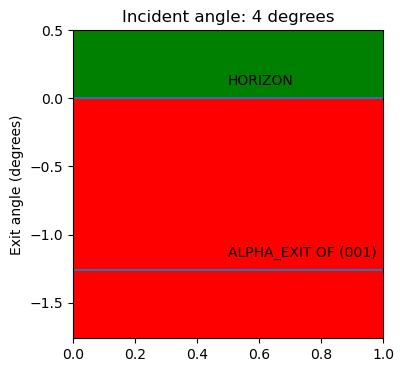

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ALPHA_INCIDENT = 4
QZ_001 = 3

alpha_exit = get_alpha_exit(
    qz=QZ_001,
    alpha_incident=ALPHA_INCIDENT,
    wavelength=WAVELENGTH,
)

ax.axhline(y = 0)
ax.text(x=0.5, y=0.1, s="HORIZON")
ax.axhline(y = alpha_exit)
ax.text(x=0.5, y=alpha_exit+0.1, s="ALPHA_EXIT OF (001)")
ax.set_ylim(alpha_exit-0.5, 0.5)
ax.set_xlim(0,1)
ax.set_ylabel("Exit angle (degrees)")
ax.set_title(f"Incident angle: {ALPHA_INCIDENT} degrees")
ax.fill_between(x=(0,1), y1=0, y2=0.5, color='green')
ax.fill_between(x=(0,1), y1=alpha_exit-0.5, y2=0, color='red')
plt.show()

##### GIWAXS geometry: the horizon is always the exit angle equals to zero, matches with qz when incident angle is zero
Increasing the incident angle reduces the available qz to prove


In [35]:
def get_height(qz, wavelength, sdd, incident_angle):
    alpha_exit = np.arcsin(qz * wavelength / (2 * np.pi) - np.sin(np.radians(incident_angle)))
    height = sdd * np.tan(np.radians(incident_angle) + alpha_exit)
    return height

In [48]:
i_angle = np.linspace(0,10,100)
height = get_height(
    qz=17,
    wavelength=WAVELENGTH,
    sdd=200,
    incident_angle=i_angle,
)

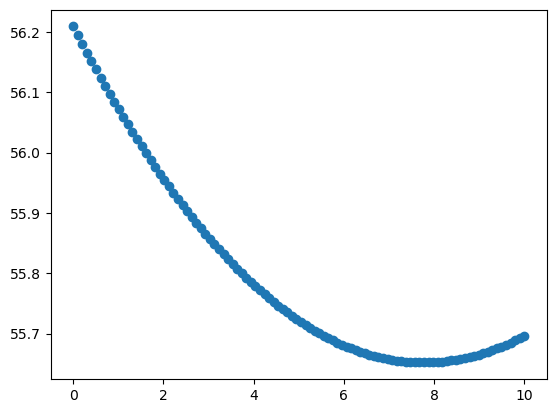

In [49]:
plt.scatter(i_angle, height)

In [47]:
i_angle[np.argmin(height)]

5.0